In [1]:
import pandas as pd
import numpy as np

In [2]:
patients = ['pBECTS001','pBECTS002','pBECTS003','pBECTS004','pBECTS005','pBECTS006','pBECTS007',
    'pBECTS009','pBECTS011','pBECTS012','pBECTS013','pBECTS015','pBECTS019','pBECTS020','pBECTS022','pBECTS025',
    'pBECTS026','pBECTS027','pBECTS029','pBECTS030','pBECTS031','pBECTS033','pBECTS037','pBECTS038','pBECTS040',
    'pBECTS042','pBECTS043','pBECTS044','pBECTS045','pBECTS046','pBECTS047']

In [3]:
RES = pd.DataFrame(columns=['image_number', 'prediction', 'probability', 'is_spike_ripple', 'imnum',
       'type','patient'])
ripple_proportion = {}
for p in patients:
    fname = "new_expert_labeled_results_clean/new_expert_labeled_"+p+'_results_clean.csv'
    res = pd.read_csv(fname)
    res['imnum'] = res['image_number'].str.split('img_',expand = True).loc[:,1].str.split(
        '.jpg',expand=True).loc[:,0]
    res['type'] = res['image_number'].str.split('/',expand=True).loc[:,1].str.split(
        '_',expand=True).loc[:,0]
    res['patient'] = p
    RES = pd.concat([RES,res],ignore_index=True)
    
    ripple_proportion[p] = sum(res['prediction'])/len(res['prediction'])

In [4]:
RES[(RES['patient']=='pBECTS003')&(RES['type']=='new')].sort_values('probability',ascending=True)

,image_number,prediction,probability,is_spike_ripple,imnum,type,patient
118,test/new_img_38.jpg,0,1.423161e-07,0,38,new,pBECTS003
185,test/new_img_6.jpg,0,3.383580e-07,0,6,new,pBECTS003
267,test/new_img_7.jpg,0,1.182623e-06,0,7,new,pBECTS003
251,test/new_img_5.jpg,0,2.263298e-06,0,5,new,pBECTS003
256,test/new_img_48.jpg,0,7.930278e-06,0,48,new,pBECTS003
244,test/new_img_24.jpg,0,8.328593e-06,0,24,new,pBECTS003
119,test/new_img_13.jpg,0,1.057146e-05,0,13,new,pBECTS003
146,test/new_img_33.jpg,0,1.361155e-05,0,33,new,pBECTS003
123,test/new_img_16.jpg,0,1.475319e-05,0,16,new,pBECTS003
126,test/new_img_46.jpg,0,2.238405e-05,0,46,new,pBECTS003


In [5]:
active = ['pBECTS003','pBECTS006','pBECTS007','pBECTS011',
          'pBECTS015','pBECTS025','pBECTS030','pBECTS033',
         'pBECTS043']
seizure_free = ['pBECTS022','pBECTS026','pBECTS027','pBECTS029','pBECTS012',
               'pBECTS009','pBECTS005','pBECTS004','pBECTS001',
               'pBECTS002']
healthy = [p for p in patients if p not in active and p not in seizure_free]
diagnosis = {p:'active' for p in patients if p in active}
diagnosis.update({p:'seizure free' for p in patients if p in seizure_free})
diagnosis.update({p:'healthy' for p in patients if p in healthy})

RES['diagnosis'] = RES['patient'].map(diagnosis)

In [6]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
            TP+= 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
            FP += 1
        if y_actual[i]==y_hat[i]==0:
            TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
            FN += 1

    return(TP, FP, TN, FN)

In [7]:
import sklearn.metrics
TP,FP,TN,FN = perf_measure(RES['is_spike_ripple'],RES['prediction'])
PPV=(TP/(TP+FP))
NPV=(TN/(TN+FN))
sensitivity=(TP/(TP+FN))
specificity=(TN/(TN+FP))
fpr,tpr,thresholds = sklearn.metrics.roc_curve(RES['is_spike_ripple'].values.astype(int), RES['probability'].values)
ROC=(sklearn.metrics.auc(fpr, tpr))
PPV, NPV, sensitivity, specificity, ROC

(0.9169096209912536,
 0.9770664118490205,
 0.9290989660265879,
 0.972882968601332,
 0.9859176109971933)

2000 negative cases, 600 positive

In [33]:
[prec,rec,thresh] = sklearn.metrics.precision_recall_curve(RES['is_spike_ripple'].values.astype(int),
                                                           RES['probability'].values)

Text(0,0.5,'Recall')

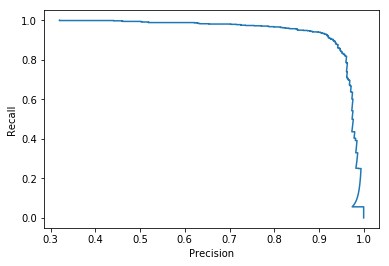

In [40]:
plt.plot(prec,rec)
plt.xlabel("Precision")
plt.ylabel("Recall")

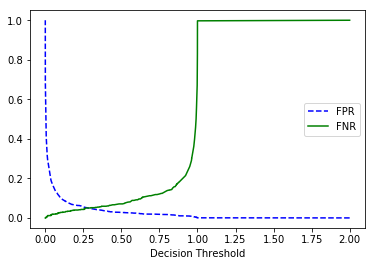

In [9]:
import matplotlib.pyplot as plt
fnr = 1-tpr
plt.plot(thresholds, fpr, "b--", label="FPR")
plt.plot(thresholds, fnr, "g-", label="FNR")
plt.xlabel("Decision Threshold")
plt.legend(loc='best')
plt.show()

In [10]:
fpr[np.argmin(abs(fpr-fnr))],tpr[np.argmin(abs(fpr-fnr))]

(0.047573739295908656, 0.9497784342688331)

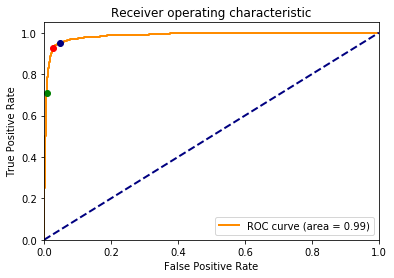

In [11]:
newthresh = thresholds[np.argmin(abs(fpr-fnr))]
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % ROC)
plt.plot(fpr[np.argmin(abs(fpr-fnr))],tpr[np.argmin(abs(fpr-fnr))],marker='o',color='navy')
plt.plot(fpr[116],tpr[116],marker='o',color='red')
plt.plot(fpr[54],tpr[54],marker='o',color='green')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Figure_2.eps', format='eps')
plt.show()

In [11]:
thresholds[np.argmin(abs(fpr-fnr))]

0.29779109358787537

In [12]:
RES['newpred'] = np.where(RES['probability']>newthresh,1,0)

In [13]:
TP,FP,TN,FN = perf_measure(RES['is_spike_ripple'],RES['newpred'])
PPV_new=(TP/(TP+FP))
NPV_new=(TN/(TN+FN))
sensitivity_new=(TP/(TP+FN))
specificity_new=(TN/(TN+FP))
PPV_new, NPV_new, sensitivity_new, specificity_new

(0.8652291105121294, 0.9828178694158075, 0.948301329394387, 0.9524262607040913)

In [14]:
PPV,NPV,sensitivity,specificity

(0.9169096209912536, 0.9770664118490205, 0.9290989660265879, 0.972882968601332)

In [15]:
RES_match = RES.loc[RES['newpred']==RES['is_spike_ripple']].sort_values('probability',ascending=False)
RES_match[RES_match['probability']>=.99].head()

,image_number,prediction,probability,is_spike_ripple,imnum,type,patient,diagnosis,newpred
2503,test/yes_img_1132.jpg,1,1.000000,1,1132,yes,pBECTS043,active,1
2541,test/yes_img_351.jpg,1,1.000000,1,351,yes,pBECTS043,active,1
2066,test/yes_img_2374.jpg,1,0.999999,1,2374,yes,pBECTS033,active,1
1968,test/yes_img_2006.jpg,1,0.999999,1,2006,yes,pBECTS033,active,1
2515,test/yes_img_779.jpg,1,0.999999,1,779,yes,pBECTS043,active,1


In [16]:
# most correct no
RES[RES['is_spike_ripple']==0].sort_values('probability').head(3)

,image_number,prediction,probability,is_spike_ripple,imnum,type,patient,diagnosis,newpred
903,test/new_img_13.jpg,0,8.441248e-13,0,13,new,pBECTS013,healthy,0
933,test/new_img_22.jpg,0,9.437660e-13,0,22,new,pBECTS013,healthy,0
920,test/new_img_11.jpg,0,2.971529e-12,0,11,new,pBECTS013,healthy,0


In [17]:
# most correct yes
RES[RES['is_spike_ripple']==1].sort_values('probability',ascending=False)

,image_number,prediction,probability,is_spike_ripple,imnum,type,patient,diagnosis,newpred
2503,test/yes_img_1132.jpg,1,1.000000,1,1132,yes,pBECTS043,active,1
2541,test/yes_img_351.jpg,1,1.000000,1,351,yes,pBECTS043,active,1
1968,test/yes_img_2006.jpg,1,0.999999,1,2006,yes,pBECTS033,active,1
2069,test/yes_img_2614.jpg,1,0.999999,1,2614,yes,pBECTS033,active,1
2066,test/yes_img_2374.jpg,1,0.999999,1,2374,yes,pBECTS033,active,1
2515,test/yes_img_779.jpg,1,0.999999,1,779,yes,pBECTS043,active,1
242,test/yes_img_1603.jpg,1,0.999998,1,1603,yes,pBECTS003,active,1
2524,test/yes_img_996.jpg,1,0.999998,1,996,yes,pBECTS043,active,1
2517,test/yes_img_943.jpg,1,0.999998,1,943,yes,pBECTS043,active,1
2426,test/yes_img_1339.jpg,1,0.999997,1,1339,yes,pBECTS043,active,1


In [18]:
# most incorrect no
RES[RES['is_spike_ripple']==1].sort_values('probability').head(3)

,image_number,prediction,probability,is_spike_ripple,imnum,type,patient,diagnosis,newpred
1165,test/yes_img_270.jpg,0,0.000358,1,270,yes,pBECTS015,active,0
1830,test/yes_img_1950.jpg,0,0.006247,1,1950,yes,pBECTS033,active,0
1036,test/yes_img_387.jpg,0,0.008001,1,387,yes,pBECTS015,active,0


In [19]:
# most incorrect yes
RES[RES['is_spike_ripple']==0].sort_values('probability',ascending=False).head(3)

,image_number,prediction,probability,is_spike_ripple,imnum,type,patient,diagnosis,newpred
810,test/no_img_19068.jpg,1,0.999962,0,19068,no,pBECTS011,active,1
2047,test/no_img_2445.jpg,1,0.999082,0,2445,no,pBECTS033,active,1
2114,test/no_img_2136.jpg,1,0.999027,0,2136,no,pBECTS033,active,1


In [20]:
# at decision threshold
RES[RES['probability']>=newthresh].sort_values('probability').head(3)

,image_number,prediction,probability,is_spike_ripple,imnum,type,patient,diagnosis,newpred
2025,test/yes_img_2985.jpg,0,0.297791,1,2985,yes,pBECTS033,active,0
827,test/no_img_20083.jpg,0,0.298945,0,20083,no,pBECTS011,active,1
2673,test/new_img_23.jpg,0,0.300154,0,23,new,pBECTS046,healthy,1


In [21]:
newthresh

0.29779109358787537

In [22]:
RES['highpred'] = np.where(RES['probability']>0.95,1,0)

In [23]:
TP,FP,TN,FN = perf_measure(RES['is_spike_ripple'],RES['highpred'])
PPV_high=(TP/(TP+FP))
NPV_high=(TN/(TN+FN))
sensitivity_high=(TP/(TP+FN))
specificity_high=(TN/(TN+FP))
PPV_high, NPV_high, sensitivity_high, specificity_high

(0.9633204633204633,
 0.9212737726669615,
 0.7370753323485968,
 0.9909609895337773)

In [24]:
PPV,NPV,sensitivity,specificity

(0.9169096209912536, 0.9770664118490205, 0.9290989660265879, 0.972882968601332)

In [25]:
pos_preds = RES[RES['prediction']==1]
false_pos = pos_preds[pos_preds['is_spike_ripple']==0].sort_values('probability',ascending=False)
#false_pos

In [26]:
labels = RES['is_spike_ripple']
K = 1000
ROC_vals = []
for k in range(K):
    permuted_label = np.random.permutation(labels)
    fpr,tpr,thresholds = sklearn.metrics.roc_curve(permuted_label.astype(int), 
                                                   RES['probability'].values)
    ROC_vals.append(sklearn.metrics.auc(fpr, tpr))

p_value = (len([r for r in ROC_vals if r > ROC])+1)/(K+1)

In [27]:
p_value

0.000999000999000999

In [28]:
PPV_new = [];NPV_new=[];sensitivity_new=[];specificity_new=[];
PPV_high = [];NPV_high=[];sensitivity_high=[];specificity_high=[];
for p in patients:
    res = RES[RES['patient'] == p]
    
    TP,FP,TN,FN = perf_measure(res['is_spike_ripple'].reset_index(drop=True),
                               res['newpred'].reset_index(drop=True))
    if TP == 0 and FP == 0:
        PPV_new.append(np.nan)
    else:
        PPV_new.append(TP/(TP+FP))
    NPV_new.append(TN/(TN+FN))
    if TP == 0 and FN == 0:
        sensitivity_new.append(np.nan)
    else:
        sensitivity_new.append(TP/(TP+FN))
    specificity_new.append(TN/(TN+FP))
    
    #TP,FP,TN,FN = perf_measure(res['is_spike_ripple'],res['prediction'])
    #PPV=(TP/(TP+FP))
    #NPV=(TN/(TN+FN))
    #sensitivity=(TP/(TP+FN))
    #specificity=(TN/(TN+FP))
    
    TP,FP,TN,FN = perf_measure(res['is_spike_ripple'].reset_index(drop=True),
                               res['highpred'].reset_index(drop=True))
    if TP == 0 and FP == 0:
        PPV_high.append(np.nan)
    else:
        PPV_high.append(TP/(TP+FP))
    NPV_high.append(TN/(TN+FN))
    if TP == 0 and FN == 0:
        sensitivity_high.append(np.nan)
    else:
        sensitivity_high.append(TP/(TP+FN))
    specificity_high.append(TN/(TN+FP))

In [76]:
res = RES[['is_spike_ripple','newpred','highpred']]

In [78]:
res.to_csv('results_for_SD_SEM_analysis.csv')

In [30]:
RES[RES['is_spike_ripple']==1]

,image_number,prediction,probability,is_spike_ripple,imnum,type,patient,diagnosis,newpred,highpred
121,test/yes_img_1300.jpg,1,0.981447,1,1300,yes,pBECTS003,active,1,1
122,test/yes_img_1307.jpg,1,0.543267,1,1307,yes,pBECTS003,active,1,0
124,test/yes_img_1274.jpg,1,0.999828,1,1274,yes,pBECTS003,active,1,1
129,test/yes_img_1702.jpg,1,0.999237,1,1702,yes,pBECTS003,active,1,1
131,test/yes_img_1807.jpg,1,0.999990,1,1807,yes,pBECTS003,active,1,1
133,test/yes_img_1168.jpg,1,0.994627,1,1168,yes,pBECTS003,active,1,1
134,test/yes_img_1176.jpg,1,0.966983,1,1176,yes,pBECTS003,active,1,1
137,test/yes_img_1768.jpg,1,0.959635,1,1768,yes,pBECTS003,active,1,1
138,test/yes_img_1303.jpg,1,0.999990,1,1303,yes,pBECTS003,active,1,1
139,test/yes_img_1765.jpg,1,0.999805,1,1765,yes,pBECTS003,active,1,1
